# **🚢 Titanic Survival Challenge**
## **Details** of The Task ✈
1. **Importing** required Libreries
2. **Getting** the data
3. **EDA** (Univariate, Multivariate, KDE, Pearson Correlation)
4. **Data Preprocessing** (Imputation, Create at least 2 New features)
5. **Model Building**
6. An inference **Pipeline** consisting of Data Preprocessing and Prediction.
7. **Cross Validation**
8. Use **ROC curve**, **Percision/ Recall** for the model's metric (NOT ALLOWED TO USE ACCURACY)
9. **Testing Predictions** on datapoints
10. **Save** file for **submission**

### 👿 **Note :**      
**It is mendatory to plot each graph and write an observation about it. Plot without title, x-label, and y-label won't be accepted**.

# 1- **Importing** the **Libraries**

In [2]:
# Preprocessing and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# For Imbalanced Data
from imblearn.over_sampling import SMOTE

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Cross Validation
from sklearn.model_selection import cross_val_score

# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# 2- **Getting** the **Data**

In [3]:
## Reading paths of Train and Test Data and storing them to a variable
train_path = r'/content/drive/MyDrive/Colab Notebooks/Projects/titanic/train.csv'
test_path = r'/content/drive/MyDrive/Colab Notebooks/Projects/titanic/test.csv'

# For Step By Step ## Reading the CSV file for Train and Test both.
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# For Pipeline
df_train = train.copy()
df_test = test.copy()

## **Data Exploration** and **Analysis**

In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **Basic Obervation** of the **Data** 📜
1. We have **total 891 rows** and **12 columns**.
2.**PassengerId** column have **unique values for each Entry**.
3. **Columns** those are **Independent variabels** and **Dependent Variable** 👇      
  - **Independent Variables** ▶
    - Name 
    - Pclass
    - Sex
    - Age
    - SibSp
    - Parch
    - Ticket
    - Fare
    - Cabin
    - Embarked
  - **Dependent Variable** ▶
    - Survived
4. In this **Dataset columns** with **DataTypes** 👇
  - **float64 = 2 Columns**

    - Age
    - Fare 
  - **int64 = 5 Columns**

    - PassengerId
    - Survived
    - Pclass
    - SibSp
    - Parch
  - **Object = 5 Columns**
    - Name
    - Sex
    - Cabin
    - Embarked
5. There are some **Null Values** in **few columns**
6. **Total Memory Uses** of Datset **83.7+ KB**



**Before doing EDA i am going to Drop some Unnecassory columns Like PassengerId**

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
## Storing PassengerId into a seperate variable to access in future
train_pass_id = train['PassengerId']
test_pass_id = test['PassengerId']

## Dropping PassengerId column from the train and test data
train = train.drop('PassengerId', axis=1)
test = test.drop('PassengerId', axis=1)

# **EDA** (Univariate, Multivariate, KDE, Pearson Correlation)

## **Univariate Analysis**

In [8]:
numerical_columns = ['Age', 'Fare']
object_columns = ['Sex', 'Embarked', 'SibSp', 'Parch','Pclass', 'Cabin', 'Survived']

print('Integer Columns : \n', numerical_columns)
print('\nObject Columns : \n', object_columns)

Integer Columns : 
 ['Age', 'Fare']

Object Columns : 
 ['Sex', 'Embarked', 'SibSp', 'Parch', 'Pclass', 'Cabin', 'Survived']


### **Analysis** of **Categorical Column**

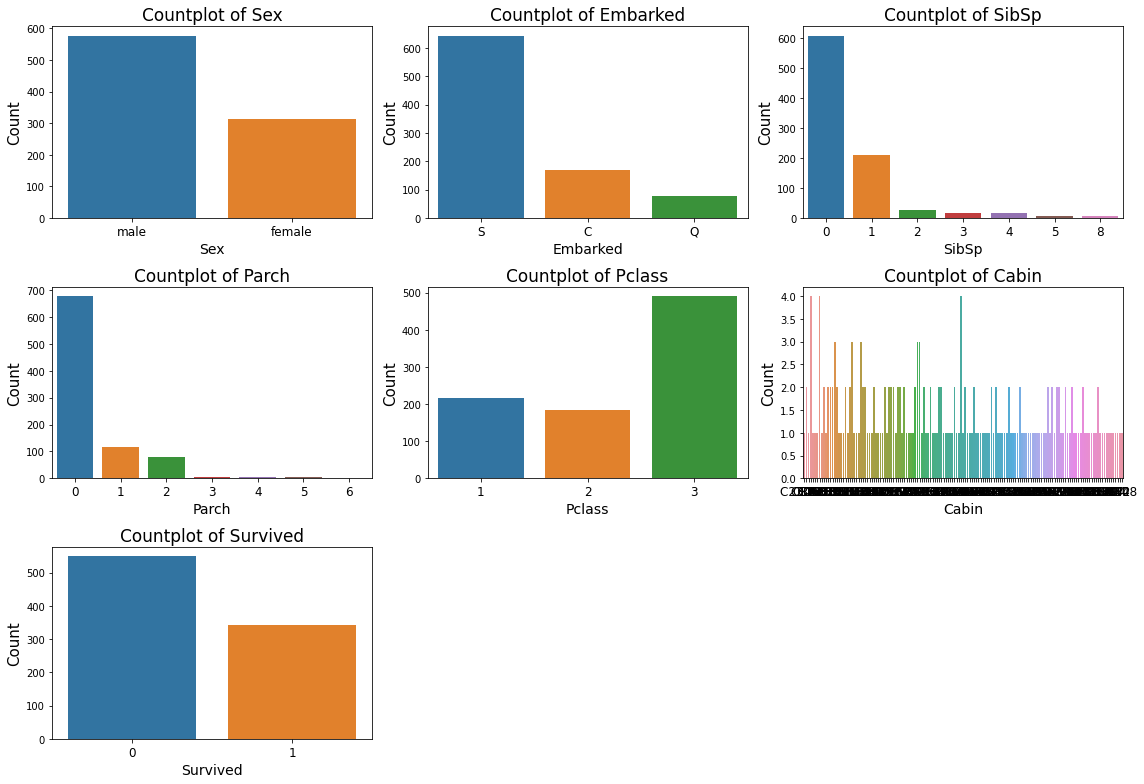

In [9]:
plt.figure(figsize=(16,11))
for i in enumerate(object_columns):
  plt.subplot(3,3,i[0]+1)
  sns.countplot(i[1], data = train)
  plt.title(f'Countplot of {i[1]}', fontsize=17)
  plt.xlabel(i[1],fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=10)
  plt.ylabel('Count', fontsize=15)
  plt.tight_layout()

#### **Observations** ✍    
**1- Countplot of Sex :**      
  - Male has the higher number of counts then female
  - Male are almost double of number of counts of female

**2- Countplot of Embarked :**
  - Embarked column showes the name of City
  - More then 600+ people traveled was from Southampton (It's maximum)
  - Around 200 people was from Cherbourg
  - Minimum around of less then 100 people treveled was from Queenstown

**3- Countplot of SibSp :**
  - Most of the people was travelling alone
  - Around 200 people was travelling with one person
  - Few of them was travelling with 2, 3, 4, 5, and 8

**4- Countplot of Parch :**
  - Most of the people was travelling alone
  - Around 100 people was travelling with one parent/child
  - Around 80 people was travelling with two parent/child
  - Rest of the people was travelling with 3, 4, 5, and 6

**5- Countplot of Pclass :**
  - Maximum number of people was travelling in class 3
  - Number of people who travelling in class 1 is greater then class 2
  - Minimum number of people was travelling in class 1

**6- Countplot of Cabin :**
  - It has more categories

**7- Countplot of Survived :**
  - Maximum people was die
  - Around 300+ people was survived

### 👿 **Note :**      
**Due to Univariate Analysis I found that my target column has Imbalenced Data Points**.

### **Analysis** of **Numerical Columns**

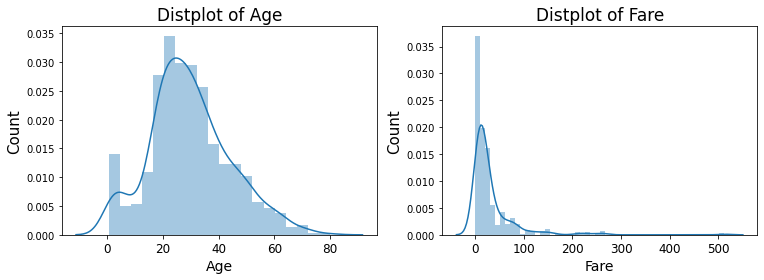

In [10]:
plt.figure(figsize=(16,4))
for i in enumerate(numerical_columns):
  plt.subplot(1,3,i[0]+1)
  sns.distplot(train[i[1]])
  plt.title(f'Distplot of {i[1]}', fontsize=17)
  plt.xlabel(i[1],fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=10)
  plt.ylabel('Count', fontsize=15)
  plt.tight_layout()

#### **Observation** ✍
**1- Distplot of Age :**
  - Age of the most of the people was from 20 to 40
  - There was child and old man was also travelling

**2- Distplot of Fare :**
  - The Fare of most of the people was less then 50 
  - the maximim fare is 500+.

## **Multivariate Analysis**

### **Analyse** **Age** and **Sex** with **Survived**

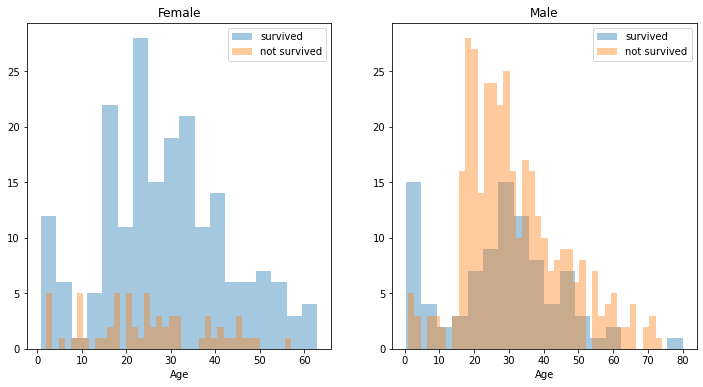

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#### **Observations** ✍
- Here we can see very clearly that Female had the high probability of Surviving then the Males.
- I can say that Men have high probability of Surviving, when they are between 18 to 30 years old.
- For womens the Survival chances are higher between 14 to 40.
- For mens the probabiity of Survival is very low between the age of 5 and 18, but that's not true for womens.
- An another thing to note is that Infants also have a little bit higher probability of Survival.

### **Analysis** of **Embarked, Pclass** and **Sex** with the **Survival**

	The Analysis of Embarked, Pclass and Sex with Survival



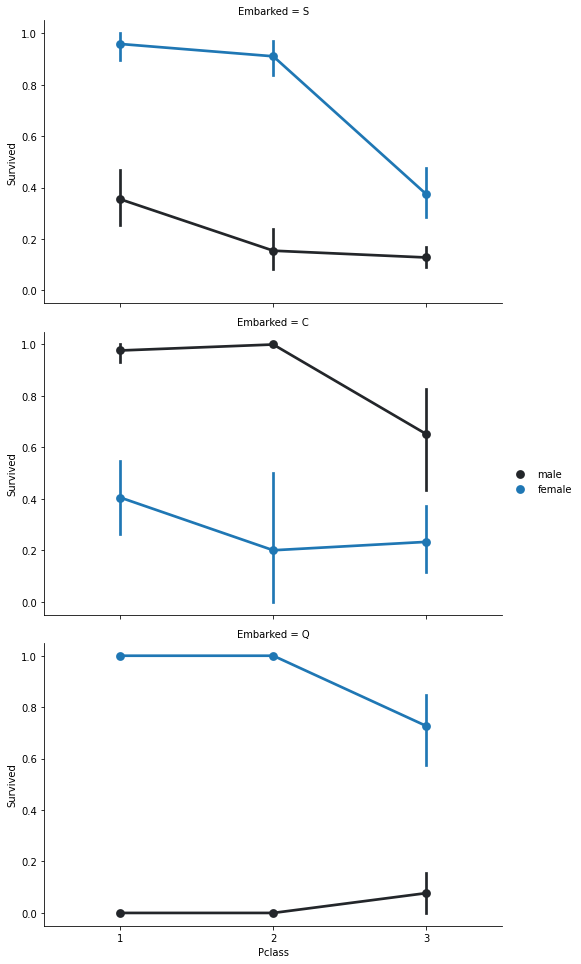

In [12]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
print('\tThe Analysis of Embarked, Pclass and Sex with Survival\n')
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend();

#### **Observations** ✍
- Embarked seems to be correlated with Survival, depending on the Gender.
- Womens from Queenstown and Sothempton have higher chance of Survival. 
- Men have a high Survival probability if they was from Cherbourge, but a low probability if they are from Q and S.
- Pclass also seems to be correlated with Survival.
- From overall graph we can say most of womens have high chances to Survive.

 ### **Analysis** of **Pclass** with **Survived**

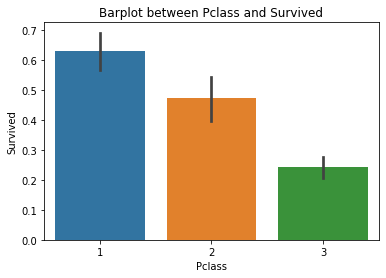

In [13]:
sns.barplot(train['Pclass'], train['Survived'])
plt.title('Barplot between Pclass and Survived');

#### **Observations** ✍
- Now here we can see clearly that, Pclass is contributing to a person's chance of Survival.
- If the person is travelling in class 1, there are high probability of Survive.
- And inverse if the person is travelling in class 3.

### **Creating another plot** of **Pclass** with **Age** for **better understanding**

			Plot between Pclass and Age with Survived



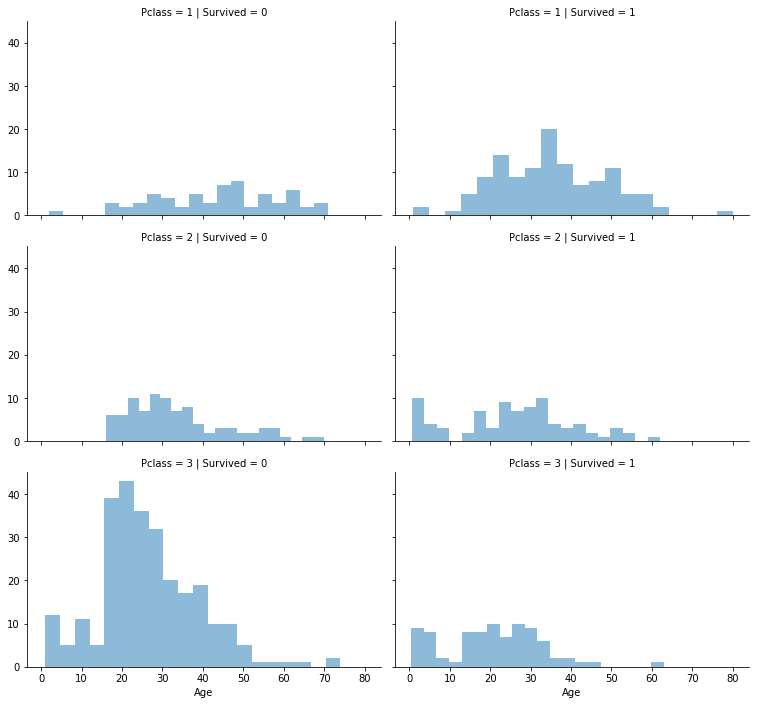

In [14]:
grid = sns.FacetGrid(train, row='Pclass', col='Survived', size=3.3, aspect=1.6)
print('\t\t\tPlot between Pclass and Age with Survived\n')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

#### **Observations** ✍
- The above confirms our assumption about pclass1, but can also spot a high probability that a person in pclass 3 will not Survived.

### **Analysis** of **SibSp** and **Parch** with **Survived**

<Figure size 720x360 with 0 Axes>

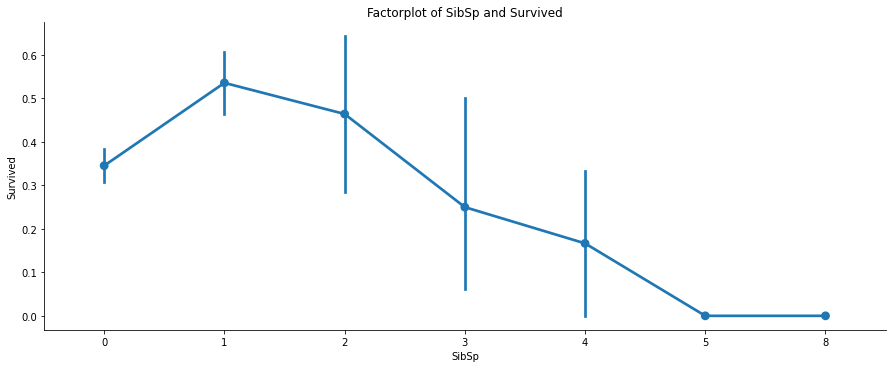

In [15]:
plt.figure(figsize=(10,5))
sns.factorplot('SibSp', 'Survived', data = train, aspect=2.5)
plt.title('Factorplot of SibSp and Survived');

#### **Observations** ✍
- As we can see if the person is travelling alone the probability of Survival is little bit low.
- But if the person is travelling with one or two sibling chances of Survival increasing.
- If the person is travelling with 3 or 4 very less Survival chances for them.
- If the person have siblings more then 4/ he/she will not survive.

<Figure size 720x360 with 0 Axes>

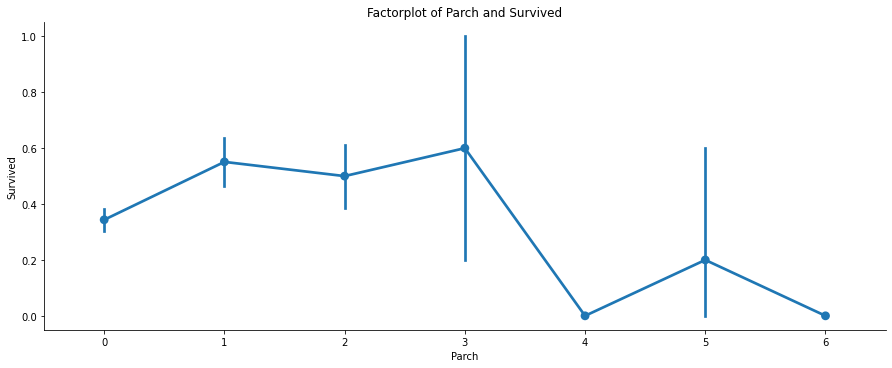

In [16]:
plt.figure(figsize=(10,5))
sns.factorplot('Parch', 'Survived', data = train, aspect=2.5)
plt.title('Factorplot of Parch and Survived');

#### **Observatons** ✍
- In Parch the similar observations are comming like SibSp.
- If the person is travelling alone Survival Chances very less.
- Survival chances increasing when the number of Parch is increasing 1 to 3.
- Those person who have more than 3 number of parch like 4, 5, and 6 they will not Survive.

**After observing SibSp and Parch. They are giving me information, but not kind of very clear way.**

**They will give more information when I create a new column with the help of these two. I will do this in feature enginearing.**

### Lets make a **pivot table** regarding with the **age groups, sex and the Pclass with Survival**
Table of survival rate by sex, age, and class

In [17]:
age = pd.cut(train['Age'], [0, 18, 40, 80])
train.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

#### **Observations** ✍
- **Female** 👩
  - Female have very high survival rate in class 1 and class 2 between 0 to 18.
  - 18 to 40 have high survival chances in class 1 and class 2.
  - 40 to 80 age women will not survive in class 3.
- **Male** 🤠
  - 0 to 18 have 80 % chances of survival rate in Class 1, but they will not Survive if they are in Class 3.
  - After that 18 to 40 have 63 % survival rate in Class2, but in class 3 they will not survive.
  - 40 to 80 age peoples don't have very good survival rate.

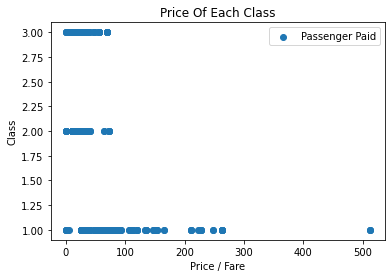

In [18]:
plt.scatter(train['Fare'], train['Pclass'], label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

#### **Observations** ✍
- Maximum fare is comming from class 1.

## **KDE**

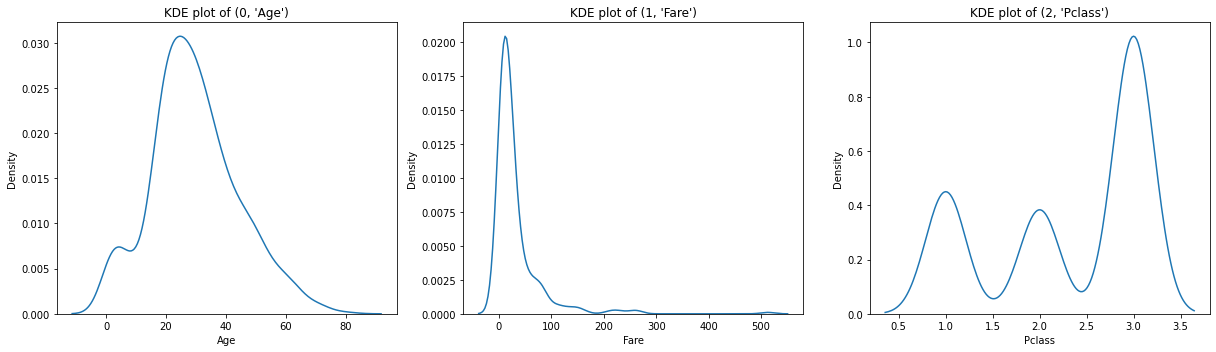

In [19]:
col = ['Age', 'Fare', 'Pclass']
plt.figure(figsize=(17,5))
for i in enumerate(col):
  plt.subplot(1,3,i[0]+1)
  sns.kdeplot(train[i[1]])
  plt.title(f'KDE plot of {i}')
  plt.tight_layout()

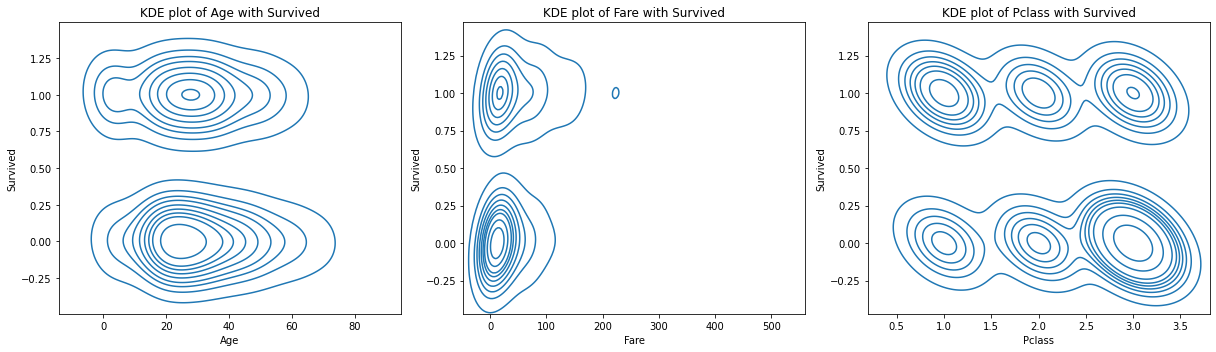

In [20]:
col = ['Age', 'Fare', 'Pclass']
plt.figure(figsize=(17,5))
for i in enumerate(col):
  plt.subplot(1,3,i[0]+1)
  sns.kdeplot(train[i[1]], train['Survived'])
  plt.title(f'KDE plot of {i[1]} with Survived')
  plt.tight_layout()

#### **Observations** ✍
- The plot of KDE strongs our analysis that we has been done above.

## **Pearson Correlation**

In [21]:
train.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


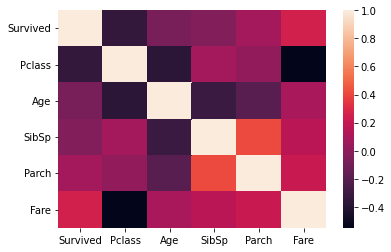

In [22]:
sns.heatmap(train.corr())

# **Data Preprocessing**

## **Missing Data**

In [23]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**As a remainder, we have to deal with Cabin (687), Age (177) and Embarked (2) missing values**

### Handling **Missing** values of **Cabin**

In [24]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

#### **Observation** ✍
- Here I found something intresting after seing unique values in Cabin.
- A Cabin number looks like 'D47' and letter refers to the deck.
- **Therefore we are going to extract these and create a new feature, that contains a person deck.**
- Missing values will be filled with Zero.
- The ranging of Cabin column is from A to G.

In [25]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature from both Datsets Train and Test
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [26]:
train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
56,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,S,8
687,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,S,8
628,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,8
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,2
667,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,S,8


### Handling **Missing** values of **Age**
I can fill these missing values between the range of mean and stander deviation and is_null

In [27]:
data = [train, test]

for dataset in data:
  mean = train['Age'].mean()
  std = test['Age'].std()
  is_null = dataset['Age'].isnull().sum()
  
  # Filling random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean - std, mean + std, size = is_null)
  
  # fill Nan values in Age column with random values generated
  age_slice = dataset['Age'].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset['Age'] = age_slice
  dataset['Age'] = train['Age'].astype(int)

In [28]:
train['Age'].isnull().sum()

0

### Handling **Missing** values of **Embarked**
In Embarked column we have only two missing values so I can fill these from most frequent category

In [29]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [30]:
data = [train, test]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

## **Modifying and Creating New Features**

## Modifying

### From **SibSp** and **Parch**

In [31]:
data = [train, test]

for dataset in data:
  dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['Relatives'] > 0, 'Alone'] = 0
  dataset.loc[dataset['Relatives'] == 0, 'Alone'] =1
  dataset['Alone'] = dataset['Alone'].astype(int)

In [32]:
train['Alone'].value_counts()

1    537
0    354
Name: Alone, dtype: int64

**Lets take a glance of Alone that i created**

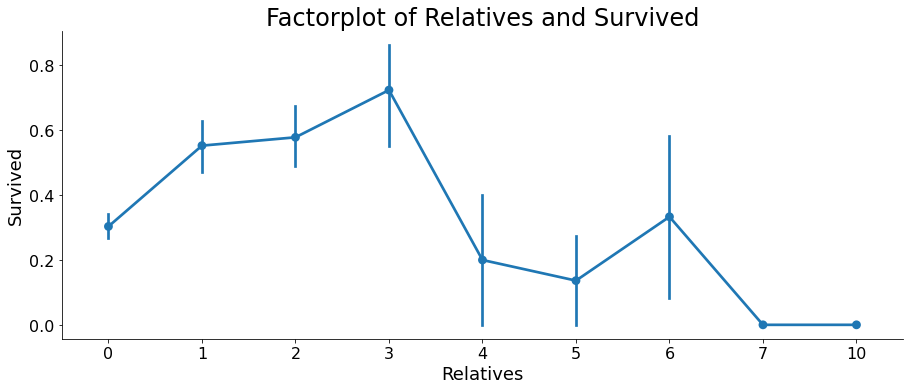

In [33]:
sns.factorplot('Relatives', 'Survived', data = train, aspect=2.5)
plt.title('Factorplot of Relatives and Survived', fontsize=24);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Relatives', fontsize=18)
plt.ylabel('Survived', fontsize=18);

**It means I have created a meaning full feature for my dataset**

### From **Name**

In [34]:
train['Name'].str.split(' ', expand=True).loc[:,1].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [35]:
data = [train, test]
titles = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
}

for dataset in data:
  # Extracting titles
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  
  # Replace titles with a more common title or as Rare
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess',
        'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  # Now Converting Titles into Numbers
  dataset['Title'] = dataset['Title'].map(titles)
  
  # Filling nan values to Zero
  dataset['Title'] = dataset['Title'].fillna(0)

## Dropping the Name column
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

### From **Age**
I will create a new variabe 'AgeGroup'

In [36]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train['Age'].value_counts()

4    164
6    160
5    147
3    143
2    116
1     93
0     68
Name: Age, dtype: int64

### From **Fare**


In [37]:
data = [train, test]

for dataset in data:
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.4), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.4) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
  dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5

In [38]:
train['Fare'] = train['Fare'].astype(int)

### **Embarked**
Converting 'Embarked' feature into numeric

In [39]:
ports = {
    'S': 0,
    'C': 1,
    'Q': 2
}
data = [train, test]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)

### **Sex**
Converting into Numerical

In [40]:
gender = {
    'male':0,
    'female':1
}
data = [train, test]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(gender)

## **Creating New Features**

### Creating **Age Time Class**

In [41]:
data = [train, test]

for dataset in data:
  dataset['AgeClass'] = dataset['Age']*dataset['Pclass']

In [42]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass
0,0,3,0,2,1,0,A/5 21171,0,0,8,1,0,1,6
1,1,1,1,5,1,0,PC 17599,3,1,3,1,0,3,5
2,1,3,1,3,0,0,STON/O2. 3101282,1,0,8,0,1,2,9
3,1,1,1,5,1,0,113803,3,0,3,1,0,3,5
4,0,3,0,5,0,0,373450,1,0,8,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,211536,1,0,8,0,1,5,6
887,1,1,1,2,0,0,112053,2,0,2,0,1,2,2
888,0,3,1,5,1,2,W./C. 6607,2,0,8,3,0,2,15
889,1,1,0,3,0,0,111369,2,1,3,0,1,1,3


### **Fare per Person**

In [43]:
for dataset in data:
  dataset['FarePerPerson'] = dataset['Fare']/(dataset['Relatives']+1)

In [44]:
train['FarePerPerson'] = train['FarePerPerson'].astype(int)

### **Final Dataset**

In [45]:
train = train.drop('Ticket', axis = 1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson
0,0,3,0,2,1,0,0,0,8,1,0,1,6,0
1,1,1,1,5,1,0,3,1,3,1,0,3,5,1
2,1,3,1,3,0,0,1,0,8,0,1,2,9,1
3,1,1,1,5,1,0,3,0,3,1,0,3,5,1
4,0,3,0,5,0,0,1,0,8,0,1,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,8,0,1,5,6,1
887,1,1,1,2,0,0,2,0,2,0,1,2,2,2
888,0,3,1,5,1,2,2,0,8,3,0,2,15,0
889,1,1,0,3,0,0,2,1,3,0,1,1,3,2


In [46]:
test = test.drop('Ticket', axis = 1)


In [47]:
test['Fare'] = test['Fare'].fillna(0)
test['Fare'] = test['Fare'].astype(int)


In [48]:
test['FarePerPerson'] = test['FarePerPerson'].fillna(0)
test['FarePerPerson'] = test['FarePerPerson'].astype(int)

In [49]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson
0,3,0,2,0,0,0,2,8,0,1,1,6,0
1,3,1,5,1,0,0,0,8,1,0,3,15,0
2,2,0,3,0,0,1,2,8,0,1,1,6,1
3,3,0,5,0,0,1,0,8,0,1,1,15,1
4,3,1,5,1,1,1,0,8,2,0,3,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,6,0,0,1,0,8,0,1,1,18,1
414,1,1,6,0,0,4,1,3,0,1,5,6,4
415,3,0,1,0,0,0,0,8,0,1,1,3,0
416,3,0,5,0,0,1,0,8,0,1,1,15,1


# **Checking** Data is **Balanced/Imbalanced**

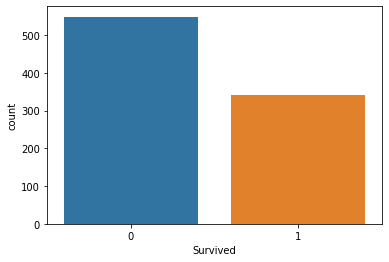

In [50]:
sns.countplot(train['Survived'])

**My output variable have imbalanced data points, So i have to balance the data for better predictions**

## **Balancing** the data using **SMOTE**

In [51]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fitting the model to generate the datapoints
train_x, train_y = sm.fit_resample(train.drop('Survived', axis=1), train['Survived'])
new_train = pd.concat([pd.DataFrame(train_x), pd.DataFrame(train_y)], axis=1)

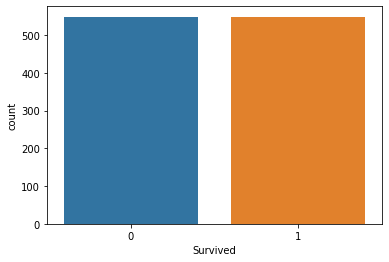

In [52]:
sns.countplot(new_train['Survived'])

**Now my data is balanced**

In [53]:
new_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson,Survived
0,3,0,2,1,0,0,0,8,1,0,1,6,0,0
1,1,1,5,1,0,3,1,3,1,0,3,5,1,1
2,3,1,3,0,0,1,0,8,0,1,2,9,1,1
3,1,1,5,1,0,3,0,3,1,0,3,5,1,1
4,3,0,5,0,0,1,0,8,0,1,1,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,2,1,6,1,1,2,0,8,2,0,3,12,0,1
1094,1,1,3,0,0,3,0,2,0,1,2,3,3,1
1095,2,1,4,2,0,2,0,8,2,0,3,11,0,1
1096,2,1,4,0,0,1,0,8,0,1,2,8,1,1


# **Train/Test Spliting**

In [54]:
X = new_train.drop('Survived', axis=1)
y = new_train['Survived']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, shuffle=True)

# **Model Building**

### **Random Forest Classifier**

In [56]:
random_forest_pipe = Pipeline([
  ('Scaler', StandardScaler()),
  ('Classifier', RandomForestClassifier())
])

#Fitting in Pipeline
random_forest_pipe.fit(X_train, y_train)
print('\n************* RandomForestClassifier *********************\n')
print('Training Set Score : ', str(random_forest_pipe.score(X_train, y_train)))
print('Testing Set Score : ', str(random_forest_pipe.score(X_test, y_test)))


************* RandomForestClassifier *********************

Training Set Score :  0.9295261239368166
Testing Set Score :  0.8036363636363636


In [57]:
rf_pred_y = random_forest_pipe.predict(X_test)

### **Logistic Regression**

In [58]:
logistic_regression_pipe = Pipeline([
  ('Scaler', StandardScaler()),
  ('Classifier', LogisticRegression())
])

#Fitting in Pipeline
logistic_regression_pipe.fit(X_train, y_train)
print('\n************* LogisticRegression *********************\n')
print('Training Set Score : ', str(logistic_regression_pipe.score(X_train, y_train)))
print('Testing Set Score : ', str(logistic_regression_pipe.score(X_test, y_test)))


************* LogisticRegression *********************

Training Set Score :  0.787363304981774
Testing Set Score :  0.8072727272727273


### **K Nearest Neighbor**

In [59]:
k_nearest_neighbor_pipe = Pipeline([
  ('Scaler', StandardScaler()),
  ('Classifier', KNeighborsClassifier())
])

#Fitting in Pipeline
k_nearest_neighbor_pipe.fit(X_train, y_train)
print('\n************* K Nearest Neighbor Classifier *********************\n')
print('Training Set Score : ', str(k_nearest_neighbor_pipe.score(X_train, y_train)))
print('Testing Set Score : ', str(k_nearest_neighbor_pipe.score(X_test, y_test)))


************* K Nearest Neighbor Classifier *********************

Training Set Score :  0.8566221142162819
Testing Set Score :  0.8290909090909091


### **Gaussian Naive Bayes**

In [60]:
gaussian_pipe = Pipeline([
  ('Scaler', StandardScaler()),
  ('Classifier', GaussianNB())
])

#Fitting in Pipeline
gaussian_pipe.fit(X_train, y_train)
print('\n************* Gaussian Naive Bayes *********************\n')
print('Training Set Score : ', str(gaussian_pipe.score(X_train, y_train)))
print('Testing Set Score : ', str(gaussian_pipe.score(X_test, y_test)))


************* Gaussian Naive Bayes *********************

Training Set Score :  0.7800729040097205
Testing Set Score :  0.7890909090909091


### **Linear Support Vector Machine**

In [61]:
linear_svc = Pipeline([
  ('Scaler', StandardScaler()),
  ('Classifier', LinearSVC())
])

#Fitting in Pipeline
linear_svc.fit(X_train, y_train)
print('\n************* Linear Support Vector Machine *********************\n')
print('Training Set Score : ', str(linear_svc.score(X_train, y_train)))
print('Testing Set Score : ', str(linear_svc.score(X_test, y_test)))


************* Linear Support Vector Machine *********************

Training Set Score :  0.7861482381530984
Testing Set Score :  0.8145454545454546


### **Decision Tree**

In [62]:
decision_tree_pipe = Pipeline([
  ('Scaler', StandardScaler()),
  ('Classifier', DecisionTreeClassifier())
])

#Fitting in Pipeline
decision_tree_pipe.fit(X_train, y_train)
print('\n************* Decision Tree Classifier *********************\n')
print('Training Set Score : ', str(decision_tree_pipe.score(X_train, y_train)))
print('Testing Set Score : ', str(decision_tree_pipe.score(X_test, y_test)))


************* Decision Tree Classifier *********************

Training Set Score :  0.9295261239368166
Testing Set Score :  0.8109090909090909


## **Choosing Best Model**

In [63]:
rfc_score = random_forest_pipe.score(X_train, y_train)
lr_score = logistic_regression_pipe.score(X_train, y_train)
knn_score = k_nearest_neighbor_pipe.score(X_train, y_train)
gussian_score = gaussian_pipe.score(X_train, y_train)
linear_svc_score = linear_svc.score(X_train, y_train)
decision_tree_score = decision_tree_pipe.score(X_train, y_train)

results = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'LogisticRegression', 'KNN',
              'Gaussian Naive Bayes', 'LinearSVC', 'DecisionTreeClassifier'],
    'Score': [rfc_score, lr_score, knn_score, gussian_score, 
              linear_svc_score, decision_tree_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
RandomForestClassifier,0.929526
DecisionTreeClassifier,0.929526
KNN,0.856622
LogisticRegression,0.787363
LinearSVC,0.786148
Gaussian Naive Bayes,0.780073


### Note 👻
- Random Forest and Decision Tree Giving same accuracy.
- And both are Best from others.

# **Cross Validation**

**Because RandomForestClassifier and DecisionTreeClassifier both are giving me almost equal accuracy**

**So I am choosing RandomforestClassifier**

In [64]:
cv = cross_val_score(random_forest_pipe, X_train, y_train, cv = 10, scoring = 'accuracy')

print('\nScores : ', cv)
print('\nMean : ', cv.mean())
print('\nStandard Deviation : ', cv.std())


Scores :  [0.75903614 0.80722892 0.84337349 0.81707317 0.86585366 0.80487805
 0.84146341 0.84146341 0.84146341 0.82926829]

Mean :  0.8251101968851013

Standard Deviation :  0.028235801482503875


#### **Observations** ✍
- This is looking more genuine than before.
- Our model has a average accuracy of 82.5 % with a standard deviation of 1%.
- The standard deviation shows us, how precise the estimates are. This means in our case that the accuracy of our model can differ + - 1%.

# **ROC AUC Curve**

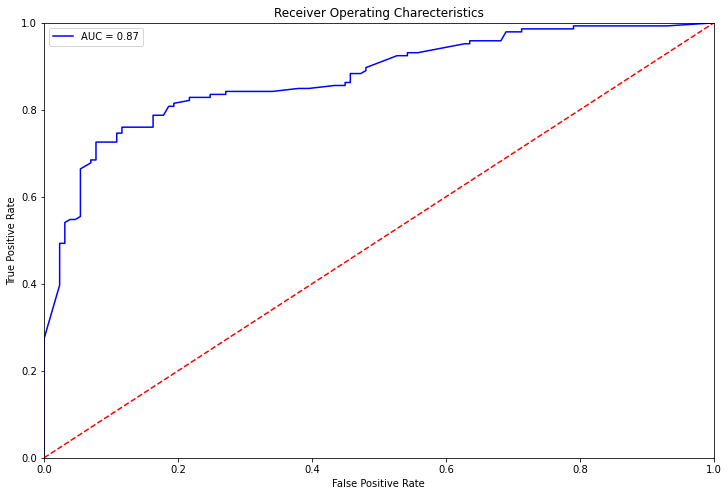

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics

pred_prob_rand = random_forest_pipe.predict_proba(X_test)

# Calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_rand[:, 1])
roc_auc = metrics.auc(fpr, tpr)

# Plotting
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'Lower Right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Charecteristics')
plt.show()

# **Testing Predictions**

In [66]:
def new_prediction(x):
  if random_forest_pipe.predict(x.drop('Survived', axis=1))[0] == 1:
    print('Survived')
  else : 
    print('Not Survived')

## First Point

In [98]:
train[1:2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson
1,1,1,1,5,1,0,3,1,3,1,0,3,5,1


In [101]:
new_prediction(train[1:2])

Survived


**Successfully Predicted**

## Second Point

In [70]:
train.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson
74,1,3,0,4,0,0,3,0,8,0,1,1,12,3


In [72]:
new_prediction(train.iloc[74:75,:])

Survived


**Successfully Predicted**

## Third Point

In [73]:
train.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson
450,0,2,0,5,1,2,2,0,8,3,0,1,10,0


In [74]:
new_prediction(train.iloc[450:451, :])

Not Survived


**Successfully Predicted**

## Fourth Point

In [75]:
train.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson
812,0,2,0,5,0,0,1,0,8,0,1,1,10,1


In [77]:
new_prediction(train.iloc[812:813, :])

Not Survived


**Successfully Predicted**

## Fifth Point

In [78]:
train.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Relatives,Alone,Title,AgeClass,FarePerPerson
116,0,3,0,6,0,0,0,2,8,0,1,1,18,0


In [79]:
new_prediction(train.iloc[116:117, :])

Not Survived


**Successfully Predicted**

**I predicted five data points all the predictions giving me good results**

# **Pridiction** on **Test Data** for **Kaggle Submission**

In [80]:
pred_submission = random_forest_pipe.predict(test)
pred_submission = pred_submission

submission_file = pd.DataFrame({
    'PassengerId' : test_pass_id,
    'Survived' : pred_submission,
})


In [81]:
submission_file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [94]:
# submission_file.to_csv('Titanic_submission.csv')

# Now my **model** has been **trained**